In [151]:
import os
import matplotlib.pyplot as plt


class gradeDataFile:
    name : str
    data : list
    
def searchFileFormat(path, fileformats):
    filesToDo = []
    for root, dirs, files in os.walk(path):
        for file in files:
            for fileformat in fileformats:
                if file.endswith(fileformat):
                    #code to generate a list of paths of files to generate logs for
                    filesToDo.append(os.path.join(root, file).split(path)[1])
    return filesToDo

def readFile(path):
    file = open(path, "r")
    filecontents = file.read()
    file.close()
    return filecontents



In [152]:
folderToSearch = "C:\\Users\\Mcall\\Desktop\\graderOutput"

filesToUse = searchFileFormat(folderToSearch, [".txt"])
grades = []
for file in filesToUse:
    currentGrade = gradeDataFile()
    currentGrade.name = file.split(".")[0].split("\\")[-1]
    currentGrade.data = []

    filecontents = readFile(folderToSearch + file)

    #code to parse the filecontents into a list of gradeDataFile objects
    #example of filecontents: 
    """\2|30.113801956176758
    \4|30.236745834350586"""

    for line in filecontents.splitlines():
        if line.startswith("\\"):
            currentGrade.data.append(line.split("|")[1])
    grades.append(currentGrade)
    
            

In [153]:
#get the total number of grades
totalGrades = 0
for grade in grades:
    totalGrades += len(grade.data)
print ("Total number of grades: " + str(totalGrades))
totalGradesminus1each = totalGrades - len(grades)
print ("Total number of grades minus 1 each: " + str(totalGradesminus1each))

Total number of grades: 6255
Total number of grades minus 1 each: 5761


In [147]:
def diffGet(gap, printChk = False):
    #check how many sucessive grades are higher than the previous one
    higher = 0
    lower = 0
    same = 0

    avgDiffLower = []
    avgDiffHigher = []
    for grade in grades:
        for i in range(gap, len(grade.data)):
            if len(grade.data) < gap:
                continue
            if float(grade.data[i]) > float(grade.data[i-gap]):
                
                higher += 1
                avgDiffHigher.append(float(grade.data[i]) - float(grade.data[i-gap]))
            elif float(grade.data[i]) < float(grade.data[i-gap]):
                lower +=1
                avgDiffLower.append(float(grade.data[i]) - float(grade.data[i-gap]))
            else :
                same += 1  
    try:
        avgHigher = sum(avgDiffHigher)/len(avgDiffHigher)
    except:
        avgHigher = 0
    try:
        avgLower = sum(avgDiffLower)/len(avgDiffLower)
    except:
        avgLower = 0
    
        
        
        
    
    if printChk:            
        print("higher: " + str(higher))
        print("lower: " + str(lower))
        print ("same: " + str(same))
        print ("higher avg: " + str(avgHigher))
        print ("lower avg: " + str(avgLower))
    
    return higher, lower, same, avgHigher, avgLower
       

In [142]:
def highLowCheck(limit, printCheck = False):
    #check if the first grade is higher than the last one
    higher = 0
    lower = 0
    same = 0
    for grade in grades:
        if len(grade.data) < limit:
            continue
        if float(grade.data[0]) < float(grade.data[-1]):
            higher += 1
        elif float(grade.data[0]) > float(grade.data[-1]):
            lower +=1
        else:
            same += 1
    if printCheck:
        print (len(grades[1].data))
        print (grades[1].data)
        print (grades[1].data[-1])
        print("higher: " + str(higher))
        print("lower: " + str(lower)) 
        print ("same: " + str(same))
    return higher, lower, same

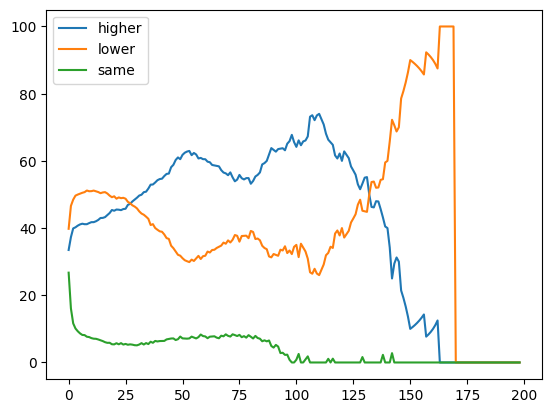

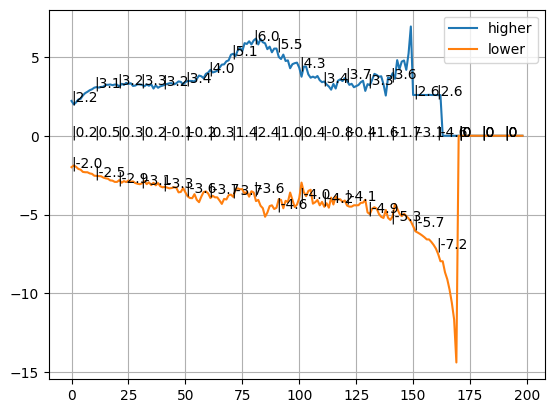

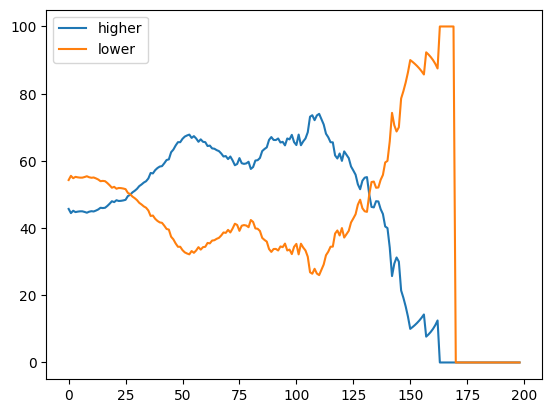

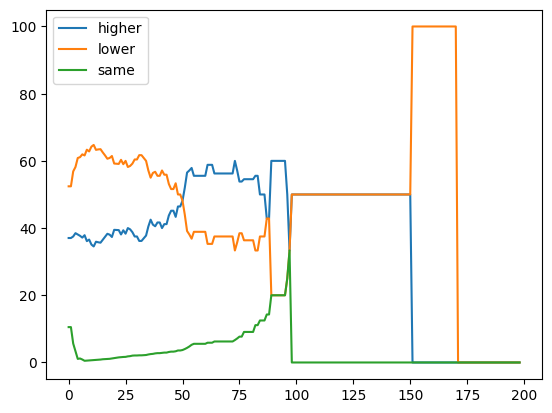

In [150]:
upperBoundForSeperations = 200



#generate graphs using results
higherOverall = []
lowerOverall = []
sameOverall = []
avgDiffHigherOverall = []
avgDiffLowerOverall = []
sameOverallPercent = []
higherOverallPercent = []
lowerOverallPercent = []
higherNonSamePrecent = []
lowerNonSamePrecent = []

hlHigh = []
hlLow = []
hlSame = []
hlHighPrec = []
hlLowPrec = []
hlSamePrec = []

for i in (range (1,upperBoundForSeperations)):
    #create a graph for each gap
    higher, lower, same, avgDiffHigher, avgDiffLower = diffGet(i)
    higherOverall.append(higher)
    lowerOverall.append(lower)
    sameOverall.append(same)
    avgDiffHigherOverall.append(avgDiffHigher)
    avgDiffLowerOverall.append(avgDiffLower)
    

for i in range(0, len(higherOverall)):
    #make a chat which tracks the presentage of higher, lower and same grades across each gap
    try:
        higherOverallPercent.append(higherOverall[i]/(higherOverall[i]+lowerOverall[i]+sameOverall[i])*100)
    except:
        higherOverallPercent.append(0)
    try:
        lowerOverallPercent.append(lowerOverall[i]/(higherOverall[i]+lowerOverall[i]+sameOverall[i])*100)
    except:
        lowerOverallPercent.append(0)
    try:
        sameOverallPercent.append(sameOverall[i]/(higherOverall[i]+lowerOverall[i]+sameOverall[i])*100)
    except:
        sameOverallPercent.append(0)
    try :
        higherNonSamePrecent.append(higherOverall[i]/(higherOverall[i]+lowerOverall[i])*100)
    except:
        higherNonSamePrecent.append(0)
    try:
        lowerNonSamePrecent.append(lowerOverall[i]/(higherOverall[i]+lowerOverall[i])*100)
    except:
        lowerNonSamePrecent.append(0)
    
    
for i in range(1, upperBoundForSeperations):
    higher, lower, same = highLowCheck(i)
    hlHigh.append(higher)
    hlLow.append(lower)
    hlSame.append(same)
    try:
        hlHighPrec.append((higher / (higher + lower + same))*100)
    except:
        hlHighPrec.append(0)
    try:
        hlLowPrec.append((lower / (higher + lower + same))*100)
    except:
        hlLowPrec.append(0)
    try:
        hlSamePrec.append((same / (higher + lower + same))*100)
    except:
        hlSamePrec.append(0)
    

plt.plot(higherOverallPercent, label = "higher")
plt.plot(lowerOverallPercent, label = "lower")
plt.plot(sameOverallPercent, label = "same")
plt.legend()
plt.show()

plt.plot(avgDiffHigherOverall, label = "higher")
plt.plot(avgDiffLowerOverall, label = "lower")
#label the graph at every 10th point
for i in range(0, len(avgDiffHigherOverall), 10):
    plt.annotate('|' + str(round(avgDiffHigherOverall[i],1)), (i, avgDiffHigherOverall[i]))
    plt.annotate('|' +str(round(avgDiffLowerOverall[i],1)), (i, avgDiffLowerOverall[i]))
    plt.annotate('|' +str(round(avgDiffHigherOverall[i]+avgDiffLowerOverall[i], 1)), (i, 0))
plt.legend()
#show grid lines
plt.grid()

plt.show()

plt.plot(higherNonSamePrecent, label = "higher")
plt.plot(lowerNonSamePrecent, label = "lower")
plt.legend()
plt.show()

plt.plot(hlHighPrec, label = "higher")
plt.plot(hlLowPrec, label = "lower")
plt.plot(hlSamePrec, label = "same")
plt.legend()
plt.show()